Задание 1.

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
y=boston.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
X_train_scaler=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaler=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
X_train_tsne=tsne.fit_transform(X_train_scaler)

<function matplotlib.pyplot.show(*args, **kw)>

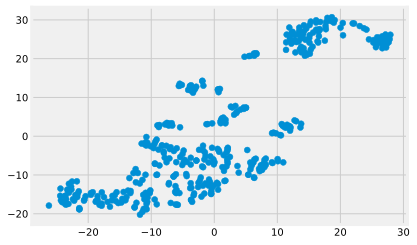

In [20]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])
plt.show

Задание 2.

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42,max_iter=100)

In [59]:
train_labels = model.fit_predict(X_train_scaler)

<function matplotlib.pyplot.show(*args, **kw)>

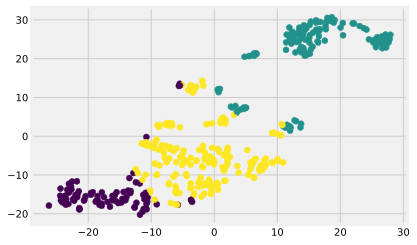

In [60]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=train_labels)
plt.show

In [62]:
print(f'Средняя цена в первой зоне {np.mean(y_train[train_labels==0]):.2f}')
print(f'Средняя цена во втрой зоне {np.mean(y_train[train_labels==1]):.2f}')
print(f'Средняя цена в третьей зоне {np.mean(y_train[train_labels==2]):.2f}')

Средняя цена в первой зоне 27.79
Средняя цена во втрой зоне 16.17
Средняя цена в третьей зоне 24.96


In [51]:
print (f"Средний CRIM в первой зоне {np.mean(X_train.loc[train_labels==0,'CRIM']):.4f}")
print (f"Средний CRIM во второй зоне {np.mean(X_train.loc[train_labels==1,'CRIM']):.4f}") 
print (f"Средний CRIM в третьей зоне {np.mean(X_train.loc[train_labels==2,'CRIM']):.4f}")       

Средний CRIM в первой зоне 0.0736
Средний CRIM во второй зоне 10.7970
Средний CRIM в третьей зоне 0.4217


* Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [63]:
test_labels=model.predict(X_test_scaler)

In [65]:
print(f'Средняя цена в первой зоне {np.mean(y_test[test_labels==0]):.2f}')
print(f'Средняя цена в первой зоне {np.mean(y_test[test_labels==1]):.2f}')
print(f'Средняя цена в первой зоне {np.mean(y_test[test_labels==2]):.2f}')

Средняя цена в первой зоне 31.35
Средняя цена в первой зоне 16.44
Средняя цена в первой зоне 21.86


In [67]:
print (f"Средний CRIM в первой зоне {np.mean(X_test.loc[test_labels==0,'CRIM']):.4f}")
print (f"Средний CRIM в первой зоне {np.mean(X_test.loc[test_labels==1,'CRIM']):.4f}")
print (f"Средний CRIM в первой зоне {np.mean(X_test.loc[test_labels==2,'CRIM']):.4f}")       

Средний CRIM в первой зоне 0.0621
Средний CRIM в первой зоне 10.1655
Средний CRIM в первой зоне 0.2661
